In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df_all = pd.read_excel("./csv_files/labeling.xlsx")
df_active = pd.read_excel("./csv_files/active_labels1.xlsx", index_col=0)
df_sample = pd.read_excel("./csv_files/sample-pergntas.xlsx")

In [11]:
df_labeled = pd.DataFrame(index=df_all.index)

In [27]:
df_active

,questions,label,p
671,Serve para Camiseta Adulto?,1,45904010059905904
673,Dependendo de quantos eu pegar vc me dar um de...,1,5356841107408620
678,"É original ou não, pois vi uma crítica dizendo...",1,5384529936418220
690,E original mesmo da Apple ? Ou primeira linha ?,1,4923346456651700
698,Quando se pergunta se é original eles só dão b...,1,5029269209264880
...,...,...,...
1967,"Boa noite, poderia me informar se vem com o ad...",1,671443009586574
1975,Cara gostaria de saber se o celular aceita est...,0,37476357048018000
1399,soma as horas?,0,1543500549964570
1628,Dura quantas limpezas (colocando a corrente de...,0,21377025391121100


In [23]:
df_labeled = df_all.copy()

In [48]:
df_active.iloc

In [49]:
for i,index in enumerate(df_active.index):
    df_labeled.iloc[index] = df_active.iloc[i]

In [54]:
df_labeled.dropna(inplace=True)

In [57]:
df_labeled.to_csv('./csv_files/active_plus_labeling.csv')

In [71]:
print(df_sample.branded_store_slug.value_counts())
print('\n',df_sample.reference_type.value_counts())
print('\n',df_sample.channel_customer_id.value_counts())
print('\n',df_sample.channel_customer_name.value_counts())


olist    100
Name: branded_store_slug, dtype: int64

 product    100
Name: reference_type, dtype: int64

 Anonimizado LGPD    100
Name: channel_customer_id, dtype: int64

 Anonimizado LGPD    100
Name: channel_customer_name, dtype: int64


In [80]:
df_sample.drop(['branded_store_slug', 'reference_type', 'channel_customer_id', 'channel_customer_name', 'reported_at'], axis=1,inplace=True)

In [83]:
df_sample.to_csv('./csv_files/sample_cleaned.csv')

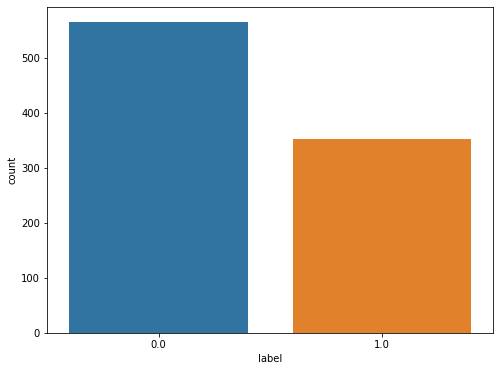

In [93]:
plt.figure(figsize=(8,6))
sns.countplot(x=df_labeled.label)

In [95]:
len(df_labeled[df_labeled.label==1]), len(df_labeled[df_labeled.label==0])

(353, 565)

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [97]:
## Create simple model to analyse

In [130]:
X_train, X_val, y_train, y_val = train_test_split(df_labeled.questions, df_labeled.label, random_state=0, test_size=0.4)

In [137]:
X_val = [item for item in X_val if not isinstance(item, int)]

In [138]:
vectorizer = TfidfVectorizer(min_df=2)
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)

In [139]:
mdl = RandomForestClassifier(n_estimators=1000,random_state=0, class_weight='balanced')
mdl.fit(X_train_bow,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [140]:
p = mdl.predict(X_val_bow)
proba = mdl.predict_proba(X_val_bow)[:,0]

In [160]:
X_sample_bow = vectorizer.transform(df_sample.body)
p_sample = mdl.predict(X_sample_bow)
proba_sample = mdl.predict_proba(X_sample_bow)[:,0]

In [161]:
proba_sample

array([0.71663214, 0.78649802, 0.47854592, 0.6652382 , 0.95471556,
       0.64209243, 0.78254649, 0.89618752, 0.56148362, 0.61890046,
       0.58002418, 0.83034727, 0.98313058, 0.63730124, 0.64410413,
       0.55130301, 0.56784568, 0.79239508, 0.65119159, 0.80564752,
       0.8       , 0.37813602, 0.4346141 , 0.776     , 0.84803373,
       0.6265598 , 0.76569147, 0.45184069, 0.69922648, 0.61635074,
       0.32033372, 0.476     , 0.77772039, 0.77672598, 0.69922648,
       0.56672891, 0.88169935, 0.75356237, 0.77491129, 0.8626907 ,
       0.47176596, 0.74978979, 0.68665653, 0.52125068, 0.9535536 ,
       0.84898153, 0.72558473, 0.41795444, 0.40579578, 0.38140867,
       0.96732427, 0.94853012, 0.47386727, 0.466     , 0.52125068,
       0.64046061, 0.59293016, 0.84596883, 0.80426558, 0.76987364,
       0.58658527, 0.4713735 , 0.49087882, 0.5910127 , 0.66124781,
       0.84768847, 0.61357945, 0.61357945, 0.40009515, 0.521551  ,
       0.90742905, 0.69787436, 0.35816434, 0.59656154, 0.55334

In [309]:
df_edited = pd.read_csv('./csv_files/edited_csv.csv', index_col=0)

In [214]:
X_train, X_val, y_train, y_val = train_test_split(df_edited.questions, df_edited.label, random_state=0, test_size=0.4)

In [215]:
vectorizer = TfidfVectorizer(min_df=2,lowercase=False)
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)

In [216]:
mdl = RandomForestClassifier(n_estimators=1000,random_state=0, class_weight='balanced')
mdl.fit(X_train_bow,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [217]:
p = mdl.predict(X_val_bow)
proba = mdl.predict_proba(X_val_bow)[:,0]

# 1.0 BASELINE

In [ ]:
recall_score(y_val,p)

In [218]:
print(classification_report(y_val,p))

              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       176
         1.0       0.71      0.77      0.74       192

    accuracy                           0.71       368
   macro avg       0.72      0.71      0.71       368
weighted avg       0.72      0.71      0.71       368



In [220]:
recall_score(y_val,p)

0.765625

In [221]:
print(confusion_matrix(y_val,p))

[[116  60]
 [ 45 147]]


In [226]:
# AUC e AP
roc_auc_score(y_val,proba), average_precision_score(y_val,proba)

(0.2096206202651515, 0.3666499003583017)

# 1.1 - BASELINE K-FOLD

In [229]:
from sklearn.model_selection import KFold

In [276]:
kf = KFold(n_splits=3, shuffle=True, random_state=0)
X=df_edited.questions
y=df_edited.label

In [ ]:
metrics = {
    'precision': [],
    'recall': [],
    'roc_auc': [],
    'ap': []
}
for lines_train, lines_val in kf.split(X):
    X_train, X_val = X.iloc[lines_train], X.iloc[lines_val]
    y_train, y_val = y.iloc[lines_train], y.iloc[lines_val]
   

    vectorizer = TfidfVectorizer(min_df=2,lowercase=False)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_val_bow = vectorizer.transform(X_val)
    
    mdl = RandomForestClassifier(n_estimators=1000,random_state=0, class_weight='balanced')
    mdl.fit(X_train_bow, y_train)
    
    p = mdl.predict(X_val_bow)
    proba = mdl.predict_proba(X_val_bow)[:,0]
    
    
    metrics['precision'].append(precision_score(y_val,p))
    metrics['recall'].append(recall_score(y_val,p))
    metrics['roc_auc'].append(roc_auc_score(y_val,proba))
    metrics['ap'].append(average_precision_score(y_val,proba))
  
    
    


In [297]:
metrics_mean = {
    'precision': None,
    'recall': None,
    'roc_auc': None,
    'ap':None
}

In [298]:

metrics_mean['precision'] = np.mean(metrics['precision'])
metrics_mean['recall'] = np.mean(metrics['recall'])
metrics_mean['roc_auc'] = np.mean(metrics['roc_auc'])
metrics_mean['ap'] = np.mean(metrics['ap'])

In [299]:
metrics_mean

{'precision': 0.7547363144333373,
 'recall': 0.7329547231991064,
 'roc_auc': 0.20201604635329962,
 'ap': 0.3895155248988884}

In [287]:
mean_dict = {
    'precision': [],
    'recall': [],
    'roc_auc': [],
    'ap': []               
}
for e in metrics:
    mean_dict['precision'].append(e['precision'])
    mean_dict['recall'].append(e['recall'])
    mean_dict['roc_auc'].append(e['roc_auc'])
    mean_dict['ap'].append(e['ap'])
        

In [308]:
x = [input()]
x_vec = vectorizer.transform(x)
p = mdl.predict(x_vec)

print('Previsão para a pergunta: ', int(p[0]))

 Esse ai é 50cm?


Previsão para a pergunta:  0
